## Central limit theorem

Choose any continuous distribution; generate a sample of volume 1000 from it, build a histogram of the sample and draw on top of it the theoretical distribution density of the selected random variable.

###### Estimate the distribution of the sample mean of a random variable for different sample sizes. 
For three or more values ​​of n, generate 1000 samples of size n and plot histograms of the distributions of their sample means. Using information about the mean and variance of the original distribution, calculate the values ​​of the parameters of the normal distributions, which, according to the CLT, approximate the distribution of the sample means. Plot the normal distribution over each histogram.

### [Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) ([scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon))

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

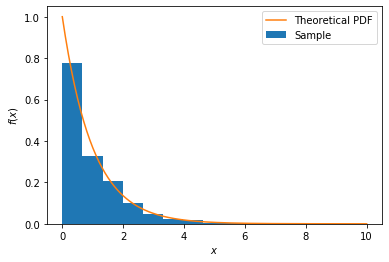

In [10]:
L = 1.0 # setting up the parameter
exp_rv = sts.expon(scale = 1.0/L)

# creating a sample on the interval [0, 10]
samp = exp_rv.rvs(1000)
x = np.linspace(0, 10, 300)

# plotting a histogram
pdf = exp_rv.pdf(x)
plt.hist(samp, density=True, label='Sample')

# plotting theoretical probability density function
plt.plot(x, pdf, label='Theoretical PDF')


plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

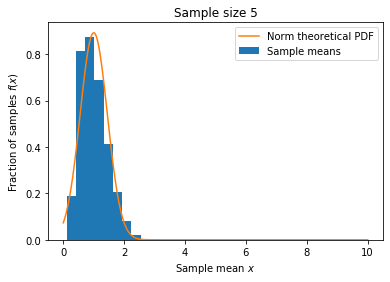

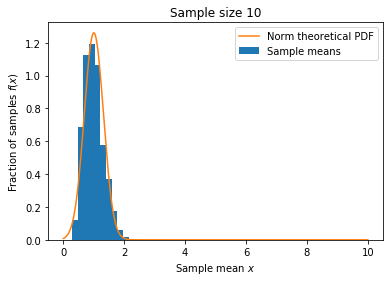

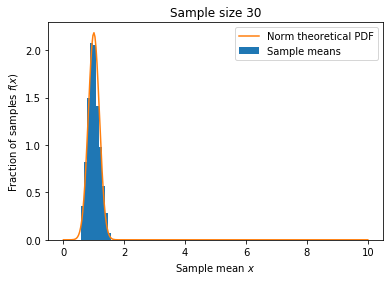

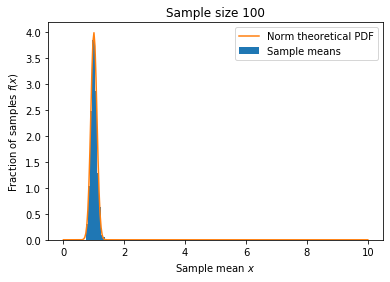

In [11]:
# generating 1000 samples of size 5, 10, 30 and 100
for n in [5, 10, 30, 100]:
    samp_means = []
    for i in range(1000):
        samp_means.append(exp_rv.rvs(n).mean()) # calculation of sample means
        
    # plotting histograms of distributions of sample means
    plt.hist(samp_means, density=True, label='Sample means')
    
    # calculating the normal distribution density with the parameter
    norm_rv = sts.norm(loc=1/L, scale=np.sqrt(1/(L**2)/n))
    pdf = norm_rv.pdf(x)
    
    # plotting
    plt.plot(x, pdf, label='Norm theoretical PDF')
    plt.legend()
    plt.title('Sample size %d' % n)
    plt.ylabel('Fraction of samples $f(x)$')
    plt.xlabel('Sample mean $x$')
    plt.show()

### The accuracy of the approximation increases with the sample size. The last calculated normal distribution is almost the same as the histogram (LLN).